In [1]:
from matplotlib import pyplot as plt
import pandas as pd

import pandasql
from pandasql import sqldf, load_meat, load_births
pysqldf = lambda q: sqldf(q, globals())

## Importing the Library

In [2]:
import pandasql
from pandasql import sqldf, load_meat, load_births
pysqldf = lambda q: sqldf(q, globals())
meats   = load_meat()
births  = load_births()

In [3]:
meats

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
822,2012-07-01,2200.8,9.5,1721.8,12.5,3127.0,43.4,497.2
823,2012-08-01,2367.5,10.1,1997.9,14.2,3317.4,51.0,530.1
824,2012-09-01,2016.0,8.8,1911.0,12.5,2927.1,43.7,453.1
825,2012-10-01,2343.7,10.3,2210.4,14.2,3335.0,43.8,579.9


In [4]:
pysqldf("SELECT strftime('%Y',DATE(date))  AS year, SUM(beef) AS beef ,SUM(veal) AS veal, SUM(pork) AS pork FROM meats GROUP BY 1 ORDER BY 1 DESC ")

,year,beef,veal,pork
0,2012,23891.9,108.2,21296.5
1,2011,26195.3,129.5,22758.2
2,2010,26304.3,134.2,22436.5
3,2009,25965.4,138.4,22999.0
4,2008,26561.2,143.1,23346.9
...,...,...,...,...
64,1948,8766.0,1323.0,8486.0
65,1947,10096.0,1493.0,8811.0
66,1946,9010.0,1329.0,9220.0
67,1945,9936.0,1552.0,8843.0


In [5]:
#A query is defined to compute what amount of meat is consumed each year.
info = pysqldf("""

            SELECT strftime('%Y',DATE(date))  AS year,
                   SUM(beef)                  AS beef,
                   SUM(veal)                  AS veal,
                   SUM(pork)                  AS pork
            FROM meats
            GROUP BY YEAR
            ORDER BY YEAR ASC

            
        """)
info

,year,beef,veal,pork
0,1944,8801.0,1629.0,11502.0
1,1945,9936.0,1552.0,8843.0
2,1946,9010.0,1329.0,9220.0
3,1947,10096.0,1493.0,8811.0
4,1948,8766.0,1323.0,8486.0
...,...,...,...,...
64,2008,26561.2,143.1,23346.9
65,2009,25965.4,138.4,22999.0
66,2010,26304.3,134.2,22436.5
67,2011,26195.3,129.5,22758.2


NameError: name 'np' is not defined

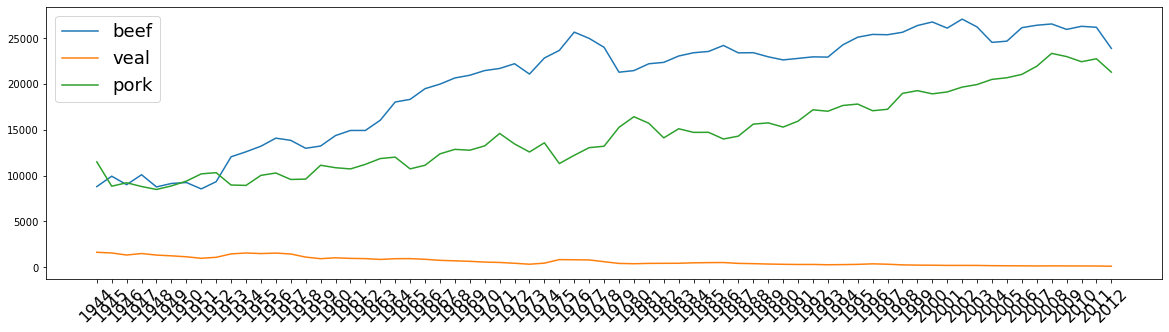

In [6]:
#We perform a quick plot to observe the behaviour of both meat consumption. 
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45, fontsize = 16)

#plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
plt.plot(info['year'].values,info['beef'].values, label='beef')
plt.plot(info['year'].values,info['veal'].values, label='veal')
plt.plot(info['year'].values,info['pork'].values, label='pork')
plt.legend(fontsize = 18)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end,10));

## Example I: Left Join

In [ ]:
#We import pandasql
import pandasql
from pandasql import sqldf, load_meat, load_births
pysqldf = lambda q: sqldf(q)


#We define our dataframes (samples from pandasql)
meats  = load_meat()
meats
births  = load_births()
births



#We perform the left join
meat_births_merged = pysqldf("""

            WITH 
            
            MEAT_BY_YEAR AS 
            
            (

            SELECT strftime('%Y',DATE(date))  AS year,
                   SUM(beef)                  AS total_beef,
                   SUM(veal)                  AS total_veal
            FROM meats
            GROUP BY YEAR
            ORDER BY YEAR DESC
            
            ),
            
            BIRTHS_BY_YEAR AS 
            
            (

            SELECT strftime('%Y',DATE(date))  AS year,
                   SUM(births)          AS total_births
            FROM births
            GROUP BY YEAR
            ORDER BY YEAR DESC
            
            )
            
            SELECT 
            
            T1.year,
            T1.total_beef,
            T1.total_veal,
            T2.total_births
            
            FROM MEAT_BY_YEAR        AS T1
            LEFT JOIN BIRTHS_BY_YEAR AS T2
              ON T1.year = T2.year
            
        """)

meat_births_merged

## Example II: CASE WHEN

In [ ]:
#We perform the case when clause to indicate which rows do not contain data, which years had a high birth rate
# and which ones did not.
pysqldf("""
            SELECT 
            
            *,
            
            CASE WHEN total_births IS NULL      THEN 'No Data'
                 WHEN total_births >= 4000000   THEN 'High Birth Rate'
                 WHEN total_births <  4000000   THEN 'Low Birth Rate'
            END AS birth_text
            
            
            FROM meat_births_merged
            
        """).head(15)